BUILDING SIMPLE NEURAL NETWORKS

In [3]:
[2]
from tensorflow.keras.datasets import mnist

In [4]:
(x_train ,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
x_train=x_train/255
x_test=x_test/355


In [28]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

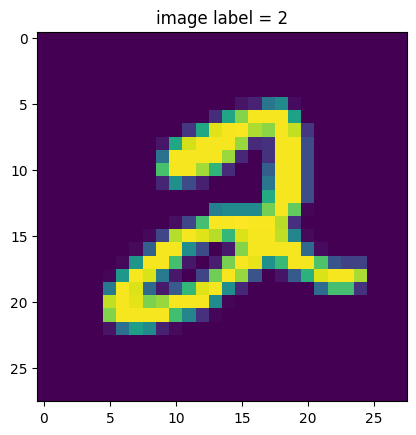

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {(y_train[5])}")
plt.show()

modelling

In [12]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical

In [13]:
model= Sequential([
    Flatten(input_shape = (28,28)),#input layer
    Dense(5,activation='relu'),#hidden 5#computation may go diffent val
    Dense(10,activation='softmax')#output layer #sigmoid for binary,thihs for mutlilevel
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()#plus 1 for bais

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs =5,batch_size=32,verbose=2)

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.6555 - loss: 1.1357
Epoch 2/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8186 - loss: 0.6195
Epoch 3/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8389 - loss: 0.5515
Epoch 4/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8507 - loss: 0.5176
Epoch 5/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8583 - loss: 0.4958


In [25]:
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

In [29]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8349 - loss: 0.5938


[0.5331187844276428, 0.8547999858856201]

In [30]:
model.save('mnist.h5')

BUILDING XOMPLEX N.NETWORKS

In [32]:
from keras.models import Model
from keras.layers import Input, Flatten,Dense,concatenate

In [33]:
input_layer = Input(shape=(28,28))

In [37]:
hidden1=Dense(128,activation='relu')(input_layer)
hidden2=Dense(256,activation='relu')(input_layer)
hidden11=Dense(64,activation='relu')(hidden1)
merge=concatenate([hidden1,hidden2])
output_layer=Dense(10,activation='softmax')(merge)

In [38]:
model= Model(inputs=input_layer,outputs=output_layer)

In [39]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 28, 128)   │      3,712 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 28, 256)   │      7,424 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 28, 384)   │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 28, 10)    │      3,850 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,986 (58.54 KB)

 Trainable params: 14,986 (58.54 KB)

 Non-trainable params: 0 (0.00 B)

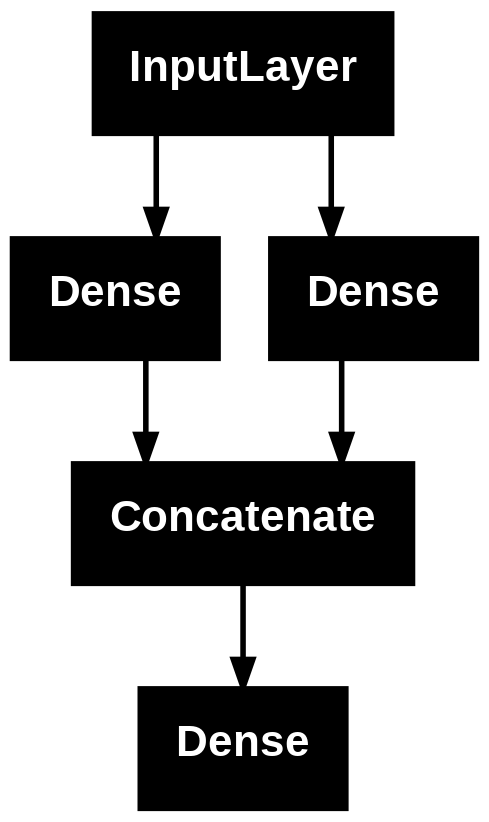

In [40]:
from keras.utils import plot_model
plot_model(model)